In [1]:
from VAE.vae import VAE
from VAE.datasets import get_dataset

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

In [3]:
## hyperparams

hps = tf.contrib.training.HParams(
    batch_size=64,
    img_height=32,
    img_width=32,
    img_channels=3,
    z_dim=100,
    discrete_outputs=False)

vae = VAE(hps)
init_op = tf.global_variables_initializer()

tf.logging.set_verbosity(tf.logging.ERROR)
sess = tf.Session()
_ = sess.run(init_op)

In [4]:
dataset = get_dataset(
    'celeba', hps.batch_size, hps.img_height, hps.img_width)

In [5]:
ref = dataset.get_reference_batch()

In [6]:
def visualize_batch(batch):
    if hps.img_channels == 1:
        batch = batch[:, :, :, 0]
    
    if dataset.img_pixel_range == (-1.0, 1.0):
        batch = 0.5 * batch + 0.5
    
    viz = np.concatenate([batch[i] for i in range(0, hps.batch_size, hps.batch_size // 6)], axis=1)
    cmap_spec = 'gray' if hps.img_channels == 1 else None
    plt.imshow(viz, cmap=cmap_spec)
    plt.show()

In [7]:
num_epochs = 3
for e in range(0, num_epochs):
    for i in range(0, dataset.train_dataset_size // hps.batch_size):
        clear_output(wait=True)
    
        x = dataset.get_batch()
        elbo = vae.train(sess, x)
        recon_x = vae.reconstruct(sess, x)
        
        print('Epoch {}, Iter {}... ELBO: {}'.format(e, i, elbo))
        visualize_batch(recon_x)
        
    dataset.new_epoch()

KeyboardInterrupt: 

In [10]:
def interpolate_random_pairs(x, num_pairs=5):
    rows = []
    def interpolate_pair():
        i = np.random.randint(hps.batch_size)
        j = np.random.randint(hps.batch_size)
        x1 = x[i]
        x2 = x[j]
        interpolations = vae.interpolate(sess, x1, x2)
        
        row = np.concatenate([x1] + [interpolations[i] for i in range(0, 5)] + [x2], axis=1)
        if hps.img_channels == 1:
            row = row[:,:,0]
        
        if dataset.img_pixel_range == (-1.0, 1.0):
            row = 0.5 * row + 0.5
            
        return row
    
    rows = [interpolate_pair() for _ in range(0, num_pairs)]
    viz = np.concatenate(rows, axis=0)
    cmap_spec = 'gray' if hps.img_channels == 1 else None
    plt.imshow(viz, cmap=cmap_spec)
    plt.show()

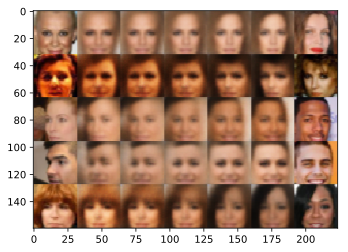

In [11]:
x = dataset.get_reference_batch()
interpolate_random_pairs(x)

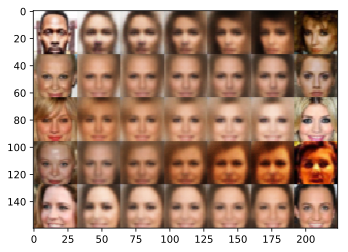

In [12]:
x = dataset.get_reference_batch()
interpolate_random_pairs(x)

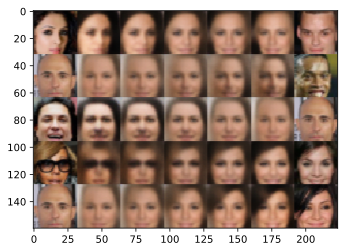

In [13]:
x = dataset.get_batch()
interpolate_random_pairs(x)